In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

This data set includes information regarding the Walt Disney World Disney parks. Some of these aspects include the hours the park is open (in relation to the time of year) and if there are events such as marathons occurring. These are all factors that may impact a Disney vacation. For example, if a guest wants to attend the parks with lower attendance and lower wait times, they won't want to visit the parks during the summertime.

In [2]:
# Uploading dataframe.
df = pd.read_csv('/Users/sophiaweidner/Downloads/disney_parks.csv')
df.head(5)

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


I am going to start by separating my datasets into two categories: numerical and categorical data. When working with this data set in the past, a lot of the categorical data shows 'NaN' so I want to separate the two and cleanse separately, and then rejoin the dataframes at the end to assess the model.

In [4]:
# Numerical data
numerics = ['int', 'float64']
num_disney_df = df.select_dtypes(include=numerics) # Creating DF with numerical columns.

,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,HSPRDDN,HSFIREWK,HSSHWNGT,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT
0,5,0,0,1,2015,0,5,1,0,0,...,NaN,0,3,1,0,NaN,NaN,NaN,NaN,0
1,6,1,0,1,2015,2,5,0,0,0,...,NaN,0,3,1,0,NaN,NaN,NaN,NaN,0
2,7,2,0,1,2015,3,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
3,1,3,1,1,2015,4,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
4,2,4,1,1,2015,5,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,6,238,34,8,2021,11,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2075,7,239,34,8,2021,10,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2076,1,240,35,8,2021,9,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2077,2,241,35,8,2021,8,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0


In [6]:
cat = ['object'] 
cat_disney_df = df.select_dtypes(include=cat) # Creating DF with categorical columns.
cat_disney_df.head()

,DATE,WDW_TICKET_SEASON,SEASON,HOLIDAYN,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWSEASON,MKeventN,EPeventN,...,EPFIREN,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNT1,HSSHWNT2,HSSHWNN,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,CHRISTMAS PEAK,nyd,NaN,NaN,NaN,CHRISTMAS PEAK,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
1,01/02/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
2,01/03/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
3,01/04/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,19:00,20:30,Fantasmic!,NaN,NaN,NaN
4,01/05/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,19:00,20:30,Fantasmic!,NaN,NaN,NaN


As we can see above, the categorical data set has many NaN values. I am going to explore this further and remove columns that have too many NaN values, and reset the rest NaN values with "no event" or something similar.

In [7]:
cat_disney_df[cat_disney_df.isna().any(axis=1)] # Checking NaN values in categorical columns.

,DATE,WDW_TICKET_SEASON,SEASON,HOLIDAYN,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWSEASON,MKeventN,EPeventN,...,EPFIREN,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNT1,HSSHWNT2,HSSHWNN,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,CHRISTMAS PEAK,nyd,NaN,NaN,NaN,CHRISTMAS PEAK,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
1,01/02/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
2,01/03/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,18:30,20:00,Fantasmic!,NaN,NaN,NaN
3,01/04/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,19:00,20:30,Fantasmic!,NaN,NaN,NaN
4,01/05/2015,NaN,CHRISTMAS,NaN,NaN,NaN,NaN,CHRISTMAS,NaN,NaN,...,IllumiNations: Reflections of Earth,NaN,NaN,NaN,19:00,20:30,Fantasmic!,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,08/27/2021,NaN,NaN,NaN,NaN,NaN,NaN,SEPTEMBER LOW,NaN,epfw,...,Epcot Forever,NaN,NaN,NaN,21:00,NaN,Wonderful World of Animation,NaN,NaN,NaN
2075,08/28/2021,NaN,NaN,NaN,NaN,NaN,NaN,SEPTEMBER LOW,NaN,epfw,...,Epcot Forever,NaN,NaN,NaN,21:00,NaN,Wonderful World of Animation,NaN,NaN,NaN
2076,08/29/2021,NaN,NaN,NaN,NaN,NaN,NaN,SEPTEMBER LOW,NaN,epfw,...,Epcot Forever,NaN,NaN,NaN,21:00,NaN,Wonderful World of Animation,NaN,NaN,NaN
2077,08/30/2021,NaN,NaN,NaN,NaN,NaN,NaN,SEPTEMBER LOW,NaN,epfw,...,Epcot Forever,NaN,NaN,NaN,21:00,NaN,Wonderful World of Animation,NaN,NaN,NaN


In [9]:
cat_disney_df.columns.tolist() # Listing columns in categorical dataset to explore further.

['DATE',
 'WDW_TICKET_SEASON',
 'SEASON',
 'HOLIDAYN',
 'WDWTICKETSEASON',
 'WDWRaceN',
 'WDWeventN',
 'WDWSEASON',
 'MKeventN',
 'EPeventN',
 'HSeventN',
 'AKeventN',
 'HOLIDAYJ',
 'inSession',
 'inSession_Enrollment',
 'inSession_wdw',
 'inSession_dlr',
 'inSession_sqrt_WDW',
 'inSession_sqrt_DLR',
 'inSession_California',
 'inSession_DC',
 'inSession_Central_FL',
 'inSession_Drive1_FL',
 'inSession_Drive2_FL',
 'inSession_Drive_CA',
 'inSession_Florida',
 'inSession_Mardi_Gras',
 'inSession_Midwest',
 'inSession_NY_NJ',
 'inSession_NY_NJ_PA',
 'inSession_New_England',
 'inSession_New_Jersey',
 'inSession_Nothwest',
 'INSESSION_PLANES',
 'inSession_SoCal',
 'inSession_Southwest',
 'MKOPEN',
 'MKCLOSE',
 'MKEMHOPEN',
 'MKEMHCLOSE',
 'MKOPENYEST',
 'MKCLOSEYEST',
 'MKOPENTOM',
 'MKCLOSETOM',
 'EPOPEN',
 'EPCLOSE',
 'EPEMHOPEN',
 'EPEMHCLOSE',
 'EPOPENYEST',
 'EPCLOSEYEST',
 'EPOPENTOM',
 'EPCLOSETOM',
 'HSOPEN',
 'HSCLOSE',
 'HSEMHOPEN',
 'HSEMHCLOSE',
 'HSOPENYEST',
 'HSCLOSEYEST',
 '

These columns are variations of each other and I am going to keep all of them. I will now replace NaN values with 'No event'.

In [10]:
cat_disney_df = cat_disney_df.fillna('no event')

In [22]:
cat_disney_df

,DATE,WDW_TICKET_SEASON,SEASON,HOLIDAYN,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWSEASON,MKeventN,EPeventN,...,EPFIREN,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNT1,HSSHWNT2,HSSHWNN,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,no event,CHRISTMAS PEAK,nyd,no event,no event,no event,CHRISTMAS PEAK,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
1,01/02/2015,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
2,01/03/2015,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
3,01/04/2015,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,19:00,20:30,Fantasmic!,no event,no event,no event
4,01/05/2015,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,19:00,20:30,Fantasmic!,no event,no event,no event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,08/27/2021,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2075,08/28/2021,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2076,08/29/2021,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2077,08/30/2021,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event


In [24]:
# I am going to change the date column to real datetime.
cat_disney_df['DATE'] =  pd.to_datetime(cat_disney_df['DATE'])

In [25]:
cat_disney_df

,DATE,WDW_TICKET_SEASON,SEASON,HOLIDAYN,WDWTICKETSEASON,WDWRaceN,WDWeventN,WDWSEASON,MKeventN,EPeventN,...,EPFIREN,HSFIRET1,HSFIRET2,HSFIREN,HSSHWNT1,HSSHWNT2,HSSHWNN,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2015-01-01,no event,CHRISTMAS PEAK,nyd,no event,no event,no event,CHRISTMAS PEAK,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
1,2015-01-02,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
2,2015-01-03,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,18:30,20:00,Fantasmic!,no event,no event,no event
3,2015-01-04,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,19:00,20:30,Fantasmic!,no event,no event,no event
4,2015-01-05,no event,CHRISTMAS,no event,no event,no event,no event,CHRISTMAS,no event,no event,...,IllumiNations: Reflections of Earth,no event,no event,no event,19:00,20:30,Fantasmic!,no event,no event,no event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2075,2021-08-28,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2076,2021-08-29,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event
2077,2021-08-30,no event,no event,no event,no event,no event,no event,SEPTEMBER LOW,no event,epfw,...,Epcot Forever,no event,no event,no event,21:00,no event,Wonderful World of Animation,no event,no event,no event


I am going to create dummy variables for my categorical data.

In [26]:
cat_disney_dummies = pd.get_dummies(cat_disney_df, prefix='', prefix_sep='')

In [28]:
cat_disney_dummies

,DATE,no event,peak,regular,value,CHRISTMAS,CHRISTMAS PEAK,COLUMBUS DAY,EASTER,FALL,...,21:15,21:30,21:45,22:00,22:15,22:30,no event,Rivers of Light,The Jungle Book: Alive with Magic,no event
0,2015-01-01,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2015-01-02,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2015-01-03,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2015-01-04,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2015-01-05,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2075,2021-08-28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2076,2021-08-29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2077,2021-08-30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Now I am going to cleanse my numerical data.

In [12]:
num_disney_df[num_disney_df.isna().any(axis=1)] # Checking NaN values in numerical columns.

,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,HSPRDDN,HSFIREWK,HSSHWNGT,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT
0,5,0,0,1,2015,0,5,1,0,0,...,NaN,0,3,1,0,NaN,NaN,NaN,NaN,0
1,6,1,0,1,2015,2,5,0,0,0,...,NaN,0,3,1,0,NaN,NaN,NaN,NaN,0
2,7,2,0,1,2015,3,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
3,1,3,1,1,2015,4,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
4,2,4,1,1,2015,5,0,0,0,0,...,NaN,0,2,1,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,6,238,34,8,2021,11,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2075,7,239,34,8,2021,10,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2076,1,240,35,8,2021,9,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0
2077,2,241,35,8,2021,8,0,0,0,0,...,NaN,0,1,1,0,NaN,NaN,NaN,NaN,0


In [13]:
num_disney_df.columns.tolist() # Listing columns in numerical dataset to explore further.

['DAYOFWEEK',
 'DAYOFYEAR',
 'WEEKOFYEAR',
 'MONTHOFYEAR',
 'YEAR',
 'HOLIDAYPX',
 'HOLIDAYM',
 'HOLIDAY',
 'WDWevent',
 'WDWrace',
 'WDWMAXTEMP',
 'WDWMINTEMP',
 'WDWMEANTEMP',
 'MKevent',
 'EPevent',
 'HSevent',
 'AKevent',
 'MKEMHMORN',
 'MKEMHMYEST',
 'MKEMHMTOM',
 'MKEMHEVE',
 'MKHOURSEMH',
 'MKHOURSEMHYEST',
 'MKHOURSEMHTOM',
 'MKEMHEYEST',
 'MKEMHETOM',
 'EPEMHMORN',
 'EPEMHMYEST',
 'EPEMHMTOM',
 'EPEMHEVE',
 'EPEMHEYEST',
 'EPEMHETOM',
 'EPHOURSEMH',
 'EPHOURSEMHYEST',
 'EPHOURSEMHTOM',
 'HSEMHMORN',
 'HSEMHMYEST',
 'HSEMHMTOM',
 'HSEMHEVE',
 'HSEMHEYEST',
 'HSEMHETOM',
 'HSHOURSEMH',
 'HSHOURSEMHYEST',
 'HSHOURSEMHTOM',
 'AKEMHMORN',
 'AKEMHMYEST',
 'AKEMHMTOM',
 'AKEMHEVE',
 'AKEMHEYEST',
 'AKEMHETOM',
 'AKHOURSEMH',
 'AKHOURSEMHYEST',
 'AKHOURSEMHTOM',
 'MKHOURS',
 'MKHOURSYEST',
 'MKHOURSTOM',
 'EPHOURS',
 'EPHOURSYEST',
 'EPHOURSTOM',
 'HSHOURS',
 'HSHOURSYEST',
 'HSHOURSTOM',
 'AKHOURS',
 'AKHOURSYEST',
 'AKHOURSTOM',
 'WEATHER_WDWHIGH',
 'WEATHER_WDWLOW',
 'WEATHER_WDWPR

I am going to remove the columns with "PRD" in them (besides the ones in MK), as those parks do not currently have parades and they would not impact modern-day Disney World. As you can see, there are a lot of columns regarding the hours of the parks 'today, tomorrow, and yesterday'. I do think it's a bit excessive to have all 3 of those columns, but will hold onto them as it does provide crucial information showing hour park hours have changed over the years.

In [14]:
num_disney_df = num_disney_df.drop(['HSPRDDAY'], axis = 1)
num_disney_df = num_disney_df.drop(['HSPRDDT1'], axis = 1)
num_disney_df = num_disney_df.drop(['HSPRDDN'], axis = 1)
num_disney_df = num_disney_df.drop(['AKPRDDAY'], axis = 1)
num_disney_df = num_disney_df.drop(['AKPRDDT1'], axis = 1)
num_disney_df = num_disney_df.drop(['AKPRDDT2'], axis = 1)
num_disney_df = num_disney_df.drop(['AKPRDDN'], axis = 1)

In [15]:
num_disney_df.columns.tolist()

['DAYOFWEEK',
 'DAYOFYEAR',
 'WEEKOFYEAR',
 'MONTHOFYEAR',
 'YEAR',
 'HOLIDAYPX',
 'HOLIDAYM',
 'HOLIDAY',
 'WDWevent',
 'WDWrace',
 'WDWMAXTEMP',
 'WDWMINTEMP',
 'WDWMEANTEMP',
 'MKevent',
 'EPevent',
 'HSevent',
 'AKevent',
 'MKEMHMORN',
 'MKEMHMYEST',
 'MKEMHMTOM',
 'MKEMHEVE',
 'MKHOURSEMH',
 'MKHOURSEMHYEST',
 'MKHOURSEMHTOM',
 'MKEMHEYEST',
 'MKEMHETOM',
 'EPEMHMORN',
 'EPEMHMYEST',
 'EPEMHMTOM',
 'EPEMHEVE',
 'EPEMHEYEST',
 'EPEMHETOM',
 'EPHOURSEMH',
 'EPHOURSEMHYEST',
 'EPHOURSEMHTOM',
 'HSEMHMORN',
 'HSEMHMYEST',
 'HSEMHMTOM',
 'HSEMHEVE',
 'HSEMHEYEST',
 'HSEMHETOM',
 'HSHOURSEMH',
 'HSHOURSEMHYEST',
 'HSHOURSEMHTOM',
 'AKEMHMORN',
 'AKEMHMYEST',
 'AKEMHMTOM',
 'AKEMHEVE',
 'AKEMHEYEST',
 'AKEMHETOM',
 'AKHOURSEMH',
 'AKHOURSEMHYEST',
 'AKHOURSEMHTOM',
 'MKHOURS',
 'MKHOURSYEST',
 'MKHOURSTOM',
 'EPHOURS',
 'EPHOURSYEST',
 'EPHOURSTOM',
 'HSHOURS',
 'HSHOURSYEST',
 'HSHOURSTOM',
 'AKHOURS',
 'AKHOURSYEST',
 'AKHOURSTOM',
 'WEATHER_WDWHIGH',
 'WEATHER_WDWLOW',
 'WEATHER_WDWPR

In [16]:
# Reassessing NaN values.
num_disney_df[num_disney_df.isna().any(axis=1)]

,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,CapacityLostWGT_AK,MKPRDDAY,MKPRDNGT,MKFIREWK,EPFIREWK,HSFIREWK,HSSHWNGT,HSFIREWKS,AKFIREN,AKSHWNGT
0,5,0,0,1,2015,0,5,1,0,0,...,20790321,2,1,1,1,0,3,1,NaN,0
1,6,1,0,1,2015,2,5,0,0,0,...,20790321,2,1,1,1,0,3,1,NaN,0
2,7,2,0,1,2015,3,0,0,0,0,...,20790321,2,1,1,1,0,2,1,NaN,0
3,1,3,1,1,2015,4,0,0,0,0,...,20790321,1,2,1,1,0,2,1,NaN,0
4,2,4,1,1,2015,5,0,0,0,0,...,20790321,1,2,1,1,0,2,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,6,238,34,8,2021,11,0,0,0,0,...,22775123,0,0,1,1,0,1,1,NaN,0
2075,7,239,34,8,2021,10,0,0,0,0,...,22775123,0,0,1,1,0,1,1,NaN,0
2076,1,240,35,8,2021,9,0,0,0,0,...,22775123,0,0,1,1,0,1,1,NaN,0
2077,2,241,35,8,2021,8,0,0,0,0,...,22775123,0,0,1,1,0,1,1,NaN,0


In this case, I believe it's beneficial to replace any NaN values with the median. There are values such as day_of_week and day_of_year that do have all of the values input. There aren't any glaring NaN values either, so to me, that means very few are being replaced. So, I will now replace values with the median.

In [17]:
print(num_disney_df.median())

DAYOFWEEK         4.0
DAYOFYEAR       184.0
WEEKOFYEAR       26.0
MONTHOFYEAR       7.0
YEAR           2017.0
                ...  
HSFIREWK          1.0
HSSHWNGT          1.0
HSFIREWKS         1.0
AKFIREN           NaN
AKSHWNGT          1.0
Length: 85, dtype: float64


Just based on that, I am going to remove AKFIREN since it has an NaN value and DAK does not have any fireworks.

In [18]:
num_disney_df = num_disney_df.drop(['AKFIREN'], axis = 1)

In [19]:
# Now, I will replace NaN values with the median.
num_disney_df.fillna(num_disney_df.median())

,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,WDWrace,...,CapacityLostWGT_HS,CapacityLostWGT_AK,MKPRDDAY,MKPRDNGT,MKFIREWK,EPFIREWK,HSFIREWK,HSSHWNGT,HSFIREWKS,AKSHWNGT
0,5,0,0,1,2015,0,5,1,0,0,...,19812520,20790321,2,1,1,1,0,3,1,0
1,6,1,0,1,2015,2,5,0,0,0,...,19812520,20790321,2,1,1,1,0,3,1,0
2,7,2,0,1,2015,3,0,0,0,0,...,19812520,20790321,2,1,1,1,0,2,1,0
3,1,3,1,1,2015,4,0,0,0,0,...,19812520,20790321,1,2,1,1,0,2,1,0
4,2,4,1,1,2015,5,0,0,0,0,...,20802421,20790321,1,2,1,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,6,238,34,8,2021,11,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2075,7,239,34,8,2021,10,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2076,1,240,35,8,2021,9,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2077,2,241,35,8,2021,8,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0


I am going to join my datasets back together.

In [30]:
disney_df = pd.concat([cat_disney_dummies, num_disney_df], axis = 1, join = 'inner')

In [31]:
disney_df

,DATE,no event,peak,regular,value,CHRISTMAS,CHRISTMAS PEAK,COLUMBUS DAY,EASTER,FALL,...,CapacityLostWGT_HS,CapacityLostWGT_AK,MKPRDDAY,MKPRDNGT,MKFIREWK,EPFIREWK,HSFIREWK,HSSHWNGT,HSFIREWKS,AKSHWNGT
0,2015-01-01,1,0,0,0,0,1,0,0,0,...,19812520,20790321,2,1,1,1,0,3,1,0
1,2015-01-02,1,0,0,0,1,0,0,0,0,...,19812520,20790321,2,1,1,1,0,3,1,0
2,2015-01-03,1,0,0,0,1,0,0,0,0,...,19812520,20790321,2,1,1,1,0,2,1,0
3,2015-01-04,1,0,0,0,1,0,0,0,0,...,19812520,20790321,1,2,1,1,0,2,1,0
4,2015-01-05,1,0,0,0,1,0,0,0,0,...,20802421,20790321,1,2,1,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2021-08-27,1,0,0,0,0,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2075,2021-08-28,1,0,0,0,0,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2076,2021-08-29,1,0,0,0,0,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0
2077,2021-08-30,1,0,0,0,0,0,0,0,0,...,29761030,22775123,0,0,1,1,0,1,1,0


I am going to explore the dataframe now to show some aspects that may impact a Disney vacation, which is ultimately why I am performing this model analysis. We are going to start by showing how capacity has changed at the different parks over the years. More capacity means more guests, which means longer waits for attractions.

In [32]:
# Starting with Magic Kingdom.
mk_cap_2019 = disney_df[disney_df['YEAR'] == 2019]
mk_cap_2020 = disney_df[disney_df['YEAR'] == 2020]
mk_cap_2021 = disney_df[df['YEAR'] == 2021]

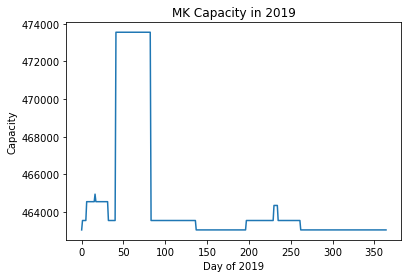

In [34]:
# 2019 Graph
plt.title('MK Capacity in 2019')
plt.xlabel('Day of 2019')
plt.ylabel('Capacity')

plt.plot(mk_cap_2019.DAYOFYEAR, mk_cap_2019.CapacityLost_MK)

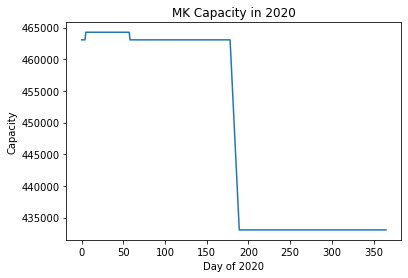

In [36]:
# 2020 Graph
plt.title('MK Capacity in 2020')
plt.xlabel('Day of 2020')
plt.ylabel('Capacity')

plt.plot(mk_cap_2020.DAYOFYEAR, mk_cap_2020.CapacityLost_MK)

# Notice that in this next graph, there is a dip due to the closure of Disney in 2020 due to COVID-19.

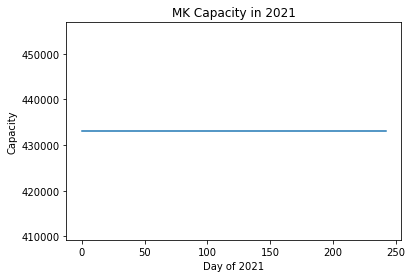

In [38]:
plt.title('MK Capacity in 2021')
plt.xlabel('Day of 2021')
plt.ylabel('Capacity')

plt.plot(mk_cap_2021.DAYOFYEAR, mk_cap_2021.CapacityLost_MK)

# The following graph only shows the first 250 days of 2021. Disney reopened in 2021 and kept steady, low
# capacity to maintain social distancing post peak COVID-19.

In [39]:
# Next, I will look at EPCOT.
ec_cap_2019 = disney_df[disney_df['YEAR'] == 2019]
ec_cap_2020 = disney_df[disney_df['YEAR'] == 2020]
ec_cap_2021 = disney_df[df['YEAR'] == 2021]

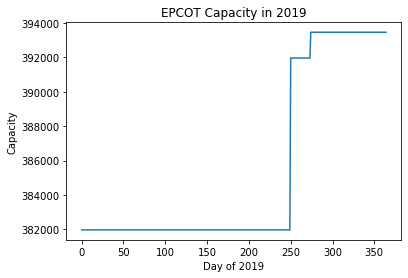

In [42]:
# 2019 Graph
plt.title('EPCOT Capacity in 2019')
plt.xlabel('Day of 2019')
plt.ylabel('Capacity')

plt.plot(ec_cap_2019.DAYOFYEAR, ec_cap_2019.CapacityLost_EP)

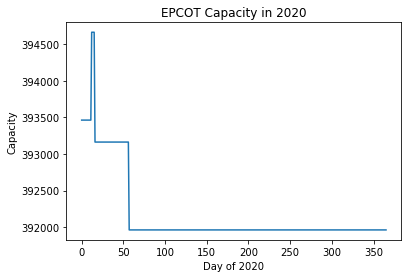

In [43]:
# 2020 Graph
plt.title('EPCOT Capacity in 2020')
plt.xlabel('Day of 2020')
plt.ylabel('Capacity')

plt.plot(ec_cap_2020.DAYOFYEAR, ec_cap_2020.CapacityLost_EP)
# Similar to the MK graph in 2020, the capacity dropped due to COVID-19.

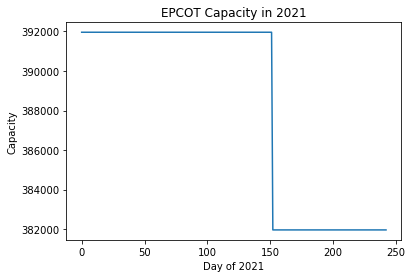

In [44]:
# 2021 Graph
plt.title('EPCOT Capacity in 2021')
plt.xlabel('Day of 2021')
plt.ylabel('Capacity')

plt.plot(ec_cap_2021.DAYOFYEAR, ec_cap_2021.CapacityLost_EP)

Based on what has been seen above, it's reasonable to assume that the same pattern applies for Animal Kingdom and Hollywood Studios as well.

# Decision Tree Model

Planning a vacation involves many decisions, and these decisions directly impact guest satisfaction. This is why I've chosen a Decision Tree Model. When previously working with this data set and this model, I had issues with replacing NaN values and thus my data analysis was not as accurate as it could've been. I decided early on (this time around) to run this dataset alongside a dataset with revenue, providing a more specific insight to the numerical side of Disney. However, due to the way I cleansed my data this time, I have decided that additional dataset is unncessary at this time and have reverted my original goal back to optimizing a Disney family vacation.

In [52]:
# Importing model.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [53]:
# Splitting data into test and train sets.
from sklearn.model_selection import train_test_split

In [60]:
# Replacing any remaining NaN values with 0.
disney_df.replace([np.inf, -np.inf], np.nan, inplace=True)
disney_df.fillna(0, inplace=True)

I am going to split my dataset based on the Week of the Year. A 'week' is an average amount of time for a family to go on a Disney vacation. Furthermore, depending on the week one travels to Disney World, you may encounter high, or low, crowds (think the week of a Holiday versus a week during spring break).

In [61]:
# Splitting dataset
# split_data = disney_df

# y = split_data.WEEKOFYEAR
# x = split_data.drop('WEEKOFYEAR',axis=1)

In [62]:
# x_train, x_test, y_train, y_test = train_test_split(x, y)

When trying to run the model on the data, I am getting an error due to the Date_Time column that was created earlier on. Because I really only needed that column for any graphs, and we have other means of telling what year and what the day is, I am going to remove this column.

In [64]:
disney_df = disney_df.drop(['DATE'], axis = 1)

In [65]:
# Splitting dataset again
split_data = disney_df

y = split_data.WEEKOFYEAR
x = split_data.drop('WEEKOFYEAR',axis=1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [67]:
# Fitting Decision Tree Model and printing the accuracy.
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", clf.score(x_test,y_test))

Accuracy: 0.7980769230769231


In [70]:
# Checking R2  and RSME
from sklearn.metrics import r2_score
from sklearn import metrics

In [72]:
# R2
r_squared_test = r2_score(y_test, y_pred) 
print('Coefficient of Determination for test set: ', r_squared_test) 

# RMSE
rmse_test = metrics.mean_squared_error(y_test, y_pred, squared=False)
print("RMSE of test set: ",rmse_test)

Coefficient of Determination for test set:  0.9990661598286487
RMSE of test set:  0.4743416490252569


Overall, the decision tree model may not be the best option for this type of data. The accuracy is a little low, coming in at just under .80. It is a sign that my data isn't over/under fit, however, it's not quite where I want the accuracy to be. Furthermore, the r squared value is coming in high and makes me question if the type of data in this dataset is reading correctly into the model. The RSME should ideally be between 0.2 and 0.5, which it is in this case. I believe there may be a model that can fit this type of data a little bit better, but the Decision Tree does a fine job. 